# Phase 2 - Supervised Learning

**Team Members:** Lana Altaweel, Hanin Alturki, Reema Almutairi, Reema Alojairy, Ghadi Alayed



## 1. Setup

In [33]:
# Import libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# Upload dataset
uploaded = files.upload()
df = pd.read_excel('cleaned_cima_dataset.xlsx')
print(f"Dataset loaded: {df.shape}")
df.head()

Saving cleaned_cima_dataset.xlsx to cleaned_cima_dataset (1).xlsx
Dataset loaded: (2368, 15)


ÿßÿ≥ŸÖ ÿßŸÑŸÅŸäŸÑŸÖ  ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿπÿ±ÿ∂ ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ  ŸÖÿØÿ© ÿßŸÑŸÅŸäŸÑŸÖ (ÿØŸÇŸäŸÇÿ©)  \
0     ŸÇŸÑÿ® ÿßŸÑŸÖÿ±ÿ£ÿ©         1940      ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä            0.062944   
1         ÿßŸÑŸàÿ±ÿ¥ÿ©         1940        ÿØÿ±ÿßŸÖÿß            0.081218   
2     ÿ™ÿ≠ÿ™ ÿßŸÑÿ≥ŸÑÿßÿ≠         1940        ÿØÿ±ÿßŸÖÿß            0.082185   
3    ÿ≠Ÿäÿßÿ© ÿßŸÑÿ∏ŸÑÿßŸÖ         1940        ÿØÿ±ÿßŸÖÿß            0.070051   
4  ÿµÿ±ÿÆÿ© ŸÅŸä ÿßŸÑŸÑŸäŸÑ         1940        ÿØÿ±ÿßŸÖÿß            0.086294   

                                                ŸÖŸÑÿÆÿµ  \
0  ÿ™ÿØŸàÿ± ÿ£ÿ≠ÿØÿßÿ´ ÿßŸÑŸÅŸäŸÑŸÖ ÿ≠ŸàŸÑ (ÿÆŸäÿ±Ÿäÿ©)ÿå ÿßŸÑŸÅÿ™ÿßÿ© ÿßŸÑÿ´ÿ±Ÿäÿ© ÿß...   
1  Ÿäÿ≥ÿßŸÅÿ± ÿßŸÑÿ£ÿ≥ÿ∑Ÿâ (ÿπŸÑŸä ÿπÿ®ÿØÿßŸÑÿ±ÿ≠ŸÖŸÜ) ÿµÿßÿ≠ÿ® Ÿàÿ±ÿ¥ÿ© ÿßŸÑŸÖŸäŸÉÿßŸÜ...   
2  ÿ£ŸÖŸäŸÜÿ© ŸÅÿ™ÿßÿ© ŸÖŸÜ ÿ£ÿ≥ÿ±ÿ© ÿπÿ±ŸäŸÇÿ©ÿå ÿ™ŸÇÿ±ÿ± ÿßŸÑÿπÿßÿ¶ŸÑÿ© ÿ≤Ÿàÿßÿ¨Ÿáÿß ...   
3  ÿπÿßÿ¶ŸÑÿ© ŸÖÿ™Ÿàÿ≥ÿ∑ÿ© ÿßŸÑÿ≠ÿßŸÑ ŸÖŸÉŸàŸÜÿ© ŸÖŸÜ ÿ≤Ÿàÿ¨ Ÿàÿ≤Ÿàÿ¨ÿ© Ÿàÿßÿ®ŸÜŸáŸÖÿß ...   
4  ŸÑÿß ÿ™ÿ≠ŸÅÿ∏ ÿßŸÑÿ≤Ÿàÿ¨ÿ© ÿßŸÑÿ≥ÿßŸÇÿ∑ÿ© ÿ¥ÿ±ŸÅ ÿ≤Ÿàÿ¨Ÿáÿß ÿßŸÑÿ´ÿ±Ÿä ÿ™ÿ±ÿ™ÿ®ÿ∑ ÿ®...   

                        ÿ™ÿ£ŸÑŸäŸÅ  \
0  ÿ™Ÿàÿ¨Ÿà ŸÖÿ≤ÿ±ÿßÿ≠Ÿä (ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÖÿ¥ÿ±ŸÇŸä)   
1  ÿπÿ≤Ÿäÿ≤ÿ© ÿ£ŸÖŸäÿ±,ŸÖÿ≠ŸÖŸàÿØ ÿ∞Ÿà ÿßŸÑŸÅŸÇÿßÿ±   
2         ÿ£ÿ®Ÿà ÿßŸÑÿ≥ÿπŸàÿØ ÿßŸÑÿ•ÿ®Ÿäÿßÿ±Ÿä   
3  ŸÖÿ≠ŸÖŸàÿØ ŸÉÿßŸÖŸÑ ÿ≠ÿ≥ŸÜ,ÿ£ÿ≠ŸÖÿØ ÿ®ÿØÿ±ÿÆÿßŸÜ   
4                 ÿßŸÑÿ≥ŸäÿØ ÿ≤ŸäÿßÿØÿ©   

                                               ÿ™ŸÖÿ´ŸäŸÑ  \
0  ÿ≥ŸÑŸäŸÖÿßŸÜ ŸÜÿ¨Ÿäÿ®,ÿ£ŸÖŸäŸÜÿ© ÿ±ÿ≤ŸÇ,ÿØŸàŸÑÿ™ ÿ£ÿ®Ÿäÿ∂,ÿπŸÇŸäŸÑÿ© ÿ±ÿßÿ™ÿ®,ÿ≥ŸÑŸà...   
1  ÿπÿ≤Ÿäÿ≤ÿ© ÿ£ŸÖŸäÿ±,ŸÖÿ≠ŸÖŸàÿØ ÿ∞Ÿà ÿßŸÑŸÅŸÇÿßÿ±,ÿ£ŸÜŸàÿ± Ÿàÿ¨ÿØŸä,ŸÜÿ¨ŸÖÿ© ÿ•ÿ®ÿ±ÿß...   
2  ÿ£ÿ≠ŸÖÿØ ÿπŸÑÿßŸÖ,ÿ≤Ÿàÿ≤Ÿà ÿ¥ŸÉŸäÿ®,ÿπÿ®ÿßÿ≥ ŸÅÿßÿ±ÿ≥,ŸÖÿ≠ŸÖÿØ ÿßŸÑÿØŸäÿ®,ÿ≤ŸäŸÜÿßÿ™...   
3  ŸÖŸäŸÖŸä ÿ¥ŸÉŸäÿ®,ŸÖÿ≠ÿ≥ŸÜ ÿ≥ÿ±ÿ≠ÿßŸÜ,ÿ±Ÿàÿ≠Ÿäÿ© ÿÆÿßŸÑÿØ,ŸÅÿ±ÿØŸàÿ≥ ŸÖÿ≠ŸÖÿØ,ÿπŸÑŸä...   
4  ÿ®ÿØÿ± ŸÑÿßŸÖÿß,ÿ±ÿ¨ÿßÿ° ÿπÿ®ÿØŸá,ÿ≥ŸÖŸäÿ≠ÿ© ÿ≥ŸÖŸäÿ≠,ÿ®ÿ¥ÿßÿ±ÿ© ŸàÿßŸÉŸäŸÖ,ŸÖŸÜÿ≥Ÿâ...   

                                ÿ•ŸÜÿ™ÿßÿ¨  \
0  ÿßŸÑÿ£ŸÅŸÑÿßŸÖ ÿßŸÑŸÖÿ™ÿ≠ÿØÿ© (ÿ£ŸÜŸàÿ± Ÿàÿ¨ÿØŸä Ÿàÿ¥ÿ±ŸÉÿßŸá)   
1                          ÿ•Ÿäÿ≤Ÿäÿ≥ ŸÅŸäŸÑŸÖ   
2                   ÿ£ŸÑŸÅŸäÿ≤Ÿâ ÿßŸàÿ±ŸÅÿßŸÜŸäŸÑŸÑŸâ   
3                ŸÖÿ≠ŸÖÿØ ÿ¨ŸÖÿßŸÑ ÿßŸÑÿØŸäŸÜ ÿ±ŸÅÿπÿ™   
4                         ŸÉŸàŸÜÿØŸàÿ± ŸÅŸäŸÑŸÖ   

                                        ÿ™ÿµŸàŸäÿ±               ŸÖŸàŸÜÿ™ÿßÿ¨  \
0                               ÿπÿ®ÿØÿßŸÑÿ≠ŸÑŸäŸÖ ŸÜÿµÿ±           ÿ¨ŸÑÿßŸÑ ŸÖÿµÿ∑ŸÅŸâ   
1  ÿ£ÿ±ÿßŸÖ ŸÖÿßÿ±ÿßŸÑŸäÿßŸÜ,ŸÅŸäÿ±Ÿâ ŸÅÿßÿ±ŸÉÿßÿ¥ (ŸÅÿ±ÿßŸÜÿ≥Ÿàÿß ŸÅÿßÿ±ŸÉÿßÿ¥)           ÿ¨ŸÑÿßŸÑ ŸÖÿµÿ∑ŸÅŸâ   
2                               ÿπÿ®ÿØÿßŸÑÿ≠ŸÑŸäŸÖ ŸÜÿµÿ±           ÿ¨ŸÑÿßŸÑ ŸÖÿµÿ∑ŸÅŸâ   
3                              ŸÖÿ≠ŸÖÿØ ÿπÿ®ÿØÿßŸÑÿπÿ∏ŸäŸÖ           ÿ¨ŸÖÿßŸÑ ŸÖÿØŸÉŸàÿ±   
4                                ÿ•ÿ®ÿ±ÿßŸáŸäŸÖ ÿ¥Ÿäÿ®ÿß  ÿ®ÿØÿ± ŸÑÿßŸÖÿß,ÿ£ŸÑÿ®Ÿäÿ± ŸÜÿ¨Ÿäÿ®   

                     ÿØŸäŸÉŸàÿ±        ŸÖŸÑÿßÿ®ÿ≥  \
0                ÿπÿ®ÿßÿ≥ ÿ≠ŸÑŸÖŸä  ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÉÿ≥ÿßÿ±   
1                ŸÖÿ≠ŸÖÿØ ŸÉÿßŸÖŸÑ  ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÉÿ≥ÿßÿ±   
2                ÿπÿ®ÿßÿ≥ ÿ≠ŸÑŸÖŸä  ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÉÿ≥ÿßÿ±   
3  ÿπŸÑŸä ÿπÿßÿ®ÿØ,ÿ±Ÿàÿ®ÿ±ÿ™ ÿ¥ÿßÿ±ŸÅŸÜÿ®ÿ±ÿ¨  ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÉÿ≥ÿßÿ±   
4              ŸÖÿ≠ÿ±Ÿàÿ≥ ÿ≤ŸäÿßÿØÿ©  ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÉÿ≥ÿßÿ±   

                                              ŸÖŸàÿ≥ŸäŸÇŸâ  \
0                                       ŸÅÿ§ÿßÿØ ÿßŸÑÿ∏ÿßŸáÿ±Ÿä   
1                                ÿπÿ®ÿØÿßŸÑÿ≠ŸÖŸäÿØ ÿπÿ®ÿØÿßŸÑÿ±ÿ≠ŸÖŸÜ   
2                                       ŸÅÿ§ÿßÿØ ÿßŸÑÿ∏ÿßŸáÿ±Ÿä   
3  ÿ®Ÿäÿ±ŸÖ ÿßŸÑÿ™ŸàŸÜÿ≥Ÿä,ÿπÿ®ÿØÿßŸÑÿ≠ŸÖŸäÿØ ÿπÿ®ÿØÿßŸÑÿ±ÿ≠ŸÖŸÜ,ŸÖÿ≠ŸÖÿØ ÿßŸÑŸÉÿ≠ŸÑÿßŸàŸä...   
4                                 ŸÅÿ±ŸäÿØ ÿ∫ÿµŸÜ,ŸäŸàÿ≥ŸÅ ÿµÿßŸÑÿ≠   

                        ÿ•ÿÆÿ±ÿßÿ¨              ÿ™Ÿàÿ≤Ÿäÿπ  
0  ÿ™Ÿàÿ¨Ÿà ŸÖÿ≤ÿ±ÿßÿ≠Ÿä (ÿ£ÿ≠ŸÖÿØ ÿßŸÑŸÖÿ¥ÿ±ŸÇŸä)  ŸÖŸÜÿ™ÿÆÿ®ÿßÿ™ ÿ®ŸáŸÜÿß ŸÅŸäŸÑŸÖ  
1               ÿ•ÿ≥ÿ™ŸäŸÅÿßŸÜ ÿ±Ÿàÿ≥ÿ™Ÿä  ŸÖŸÜÿ™ÿÆÿ®ÿßÿ™ ÿ®ŸáŸÜÿß ŸÅŸäŸÑŸÖ  
2              ŸÅÿ§ÿßÿØ ÿßŸÑÿ¨ÿ≤ÿßŸäÿ±ŸÑŸä  ŸÖŸÜÿ™ÿÆÿ®ÿßÿ™ ÿ®ŸáŸÜÿß ŸÅŸäŸÑŸÖ  
3     ÿ£ÿ≠ŸÖÿØ ÿ®ÿØÿ±ÿÆÿßŸÜ,ŸÅÿ±ŸäÿØ ÿßŸÑÿ¨ŸÜÿØŸä  ŸÖŸÜÿ™ÿÆÿ®ÿßÿ™ ÿ®ŸáŸÜÿß ŸÅŸäŸÑŸÖ  
4                ÿ•ÿ®ÿ±ÿßŸáŸäŸÖ Ÿ

## 2. Understand Class Imbalance Problem

Genre Distribution:
ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ
ÿØÿ±ÿßŸÖÿß           1719
ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä          249
ŸÉŸàŸÖŸäÿØŸä           127
Ô∫óÔ∫∏ÔªÆÔª≥Ôªñ Ôª≠Ô∫áÔ∫õÔ∫éÔ∫≠Ô∫ì     107
ÿ≠ÿ±ŸÉÿ©              37
ŸÖÿ∫ÿßŸÖÿ±ÿßÿ™           23
ÿßÿ≥ÿ™ÿπÿ±ÿßÿ∂Ÿä          19
ÿ™ÿßÿ±ŸäÿÆŸä            18
ÿ≥Ÿäÿ±ÿ© ÿ∞ÿßÿ™Ÿäÿ©        16
ÿ¨ÿ±ŸäŸÖÿ©             12
Name: count, dtype: int64


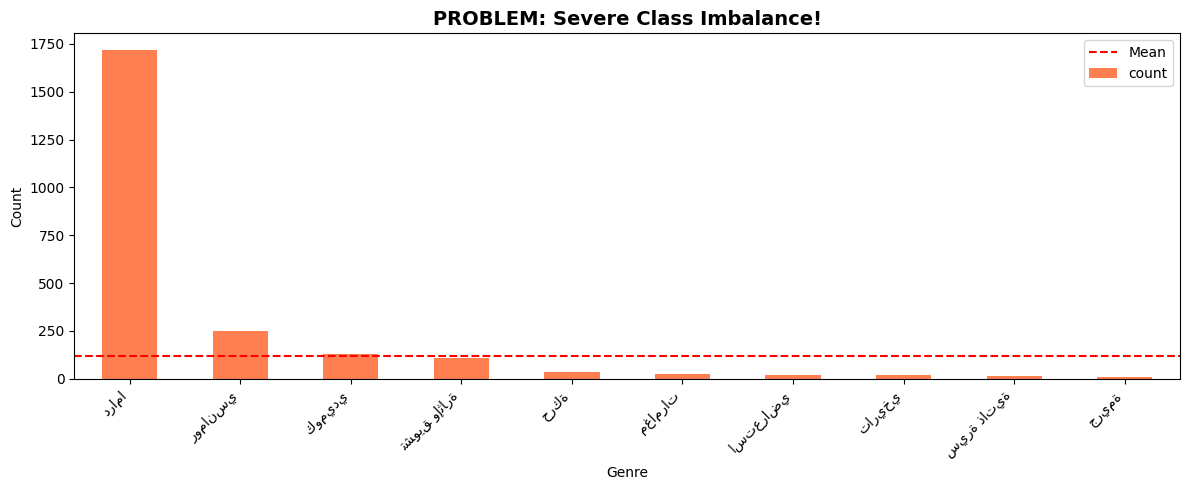


‚ö†Ô∏è PROBLEM IDENTIFIED:
  Drama dominates: 1719 movies (72.6% of data!)
  Imbalance ratio: 46.5:1

  Result: Models will predict Drama for everything!


In [34]:
# Analyze class distribution
print("Genre Distribution:")
genre_counts = df['ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ'].value_counts()
print(genre_counts.head(10))

# Visualize the problem
plt.figure(figsize=(12, 5))
genre_counts.head(10).plot(kind='bar', color='coral')
plt.title('PROBLEM: Severe Class Imbalance!', fontweight='bold', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=genre_counts.mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n‚ö†Ô∏è PROBLEM IDENTIFIED:")
print(f"  Drama dominates: {genre_counts.iloc[0]} movies ({genre_counts.iloc[0]/len(df)*100:.1f}% of data!)")
print(f"  Imbalance ratio: {genre_counts.iloc[0] / genre_counts.iloc[4]:.1f}:1")
print(f"\n  Result: Models will predict Drama for everything!")

## 3. Data Preparation

In [35]:
# Focus on top 3 genres to reduce extreme imbalance
top_genres = ['ÿØÿ±ÿßŸÖÿß', 'ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä', 'ŸÉŸàŸÖŸäÿØŸä']
df_filtered = df[df['ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ'].isin(top_genres)].copy()

print(f"Working with top 3 genres:")
print(df_filtered['ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ'].value_counts())
print(f"\nDataset size: {len(df_filtered)} movies")

# Prepare features (TF-IDF from movie summaries)
print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
X = tfidf.fit_transform(df_filtered['ŸÖŸÑÿÆÿµ'].fillna(''))

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_filtered['ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ'])

print(f"Feature matrix shape: {X.shape}")
print(f"Classes: {label_encoder.classes_}")

Working with top 3 genres:
ÿ™ÿµŸÜŸäŸÅ ÿßŸÑŸÅŸäŸÑŸÖ
ÿØÿ±ÿßŸÖÿß      1719
ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä     249
ŸÉŸàŸÖŸäÿØŸä      127
Name: count, dtype: int64

Dataset size: 2095 movies

FEATURE ENGINEERING
Feature matrix shape: (2095, 500)
Classes: ['ÿØÿ±ÿßŸÖÿß' 'ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä' 'ŸÉŸàŸÖŸäÿØŸä']


## 4. Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure balanced split
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1676, 500), Test: (419, 500)


## 5. Apply SMOTE (Synthetic Minority Over-sampling)

In [37]:
print("Original training class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for i, count in zip(unique, counts):
    print(f"  {label_encoder.classes_[i]:15s}: {count:4d} samples")

# Apply SMOTE
print("\nApplying SMOTE to create synthetic samples...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nBalanced training class distribution:")
unique, counts = np.unique(y_train_balanced, return_counts=True)
for i, count in zip(unique, counts):
    print(f"  {label_encoder.classes_[i]:15s}: {count:4d} samples (BALANCED!)")

print(f"\n‚úì Training set increased from {len(y_train)} to {len(y_train_balanced)} samples")

Original training class distribution:
  ÿØÿ±ÿßŸÖÿß          : 1375 samples
  ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä        :  199 samples
  ŸÉŸàŸÖŸäÿØŸä         :  102 samples

Applying SMOTE to create synthetic samples...

Balanced training class distribution:
  ÿØÿ±ÿßŸÖÿß          : 1375 samples (BALANCED!)
  ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä        : 1375 samples (BALANCED!)
  ŸÉŸàŸÖŸäÿØŸä         : 1375 samples (BALANCED!)

‚úì Training set increased from 1676 to 4125 samples


## 6. Algorithm Selection & Justification

### Why These Algorithms?

For our **text classification problem with imbalanced data**, we selected 4 diverse algorithms:

#### **1. Logistic Regression**
- **Reason:** Simple baseline, interpretable, fast training
- **Good for:** Linear relationships in TF-IDF features
- **Handles imbalance:** Via `class_weight='balanced'` parameter
- **Best when:** Features are somewhat linearly separable

#### **2. Random Forest**
- **Reason:** Ensemble method reduces overfitting, handles high-dimensional data
- **Good for:** Non-linear patterns, feature importance analysis
- **Handles imbalance:** Built-in class weighting + works well with SMOTE
- **Best when:** Need robust predictions with minimal tuning

#### **3. Support Vector Machine (SVM)**
- **Reason:** Excellent for high-dimensional sparse data (like TF-IDF)
- **Good for:** Finding optimal decision boundaries in complex spaces
- **Handles imbalance:** `class_weight='balanced'` adjusts decision boundary
- **Best when:** Data is not linearly separable (RBF kernel)

#### **4. Gradient Boosting**
- **Reason:** Powerful ensemble that learns from mistakes sequentially
- **Good for:** Complex patterns, usually highest accuracy
- **Handles imbalance:** Focuses on hard-to-classify minority samples
- **Best when:** Need maximum predictive power


## 7. Model Training (With Balancing Techniques)

In [38]:
print("Training models with balanced data...\n")

models = {}

# 1. Logistic Regression
print("1/4 Training Logistic Regression...")
models['Logistic Regression'] = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
models['Logistic Regression'].fit(X_train_balanced, y_train_balanced)

# 2. Random Forest with class weights
print("2/4 Training Random Forest...")
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight='balanced',  # KEY: This helps!
    random_state=42
)
models['Random Forest'].fit(X_train_balanced, y_train_balanced)

# 3. SVM with class weights
print("3/4 Training SVM...")
# Use more aggressive class weights for minority classes
class_weights = {
    0: 1.0,   # Drama (majority)
    1: 3.0,   # Romance (boost 3x)
    2: 5.0    # Comedy (boost 5x)
}

models['SVM'] = SVC(
    kernel='rbf',
    C=1.0,
    class_weight=class_weights,  # ‚Üê CHANGED
    probability=True,
    random_state=42
)
models['SVM'].fit(X_train_balanced, y_train_balanced)

print("   ‚úì Using aggressive class weights: Drama=1.0, Romance=3.0, Comedy=5.0")

# 4. Gradient Boosting
print("4/4 Training Gradient Boosting...")
models['Gradient Boosting'] = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
models['Gradient Boosting'].fit(X_train_balanced, y_train_balanced)

print("\n‚úì All models trained with balanced data!")

Training models with balanced data...

1/4 Training Logistic Regression...
2/4 Training Random Forest...
3/4 Training SVM...
   ‚úì Using aggressive class weights: Drama=1.0, Romance=3.0, Comedy=5.0
4/4 Training Gradient Boosting...

‚úì All models trained with balanced data!


In [39]:
print("\n" + "="*80)
print("THRESHOLD ADJUSTMENT FOR MINORITY CLASSES")
print("="*80)

# Get probability predictions instead of hard predictions
print("\nAdjusting decision thresholds to favor minority classes...")

# For SVM only (our best model)
y_pred_proba = models['SVM'].predict_proba(X_test)

# Adjust predictions by boosting minority class probabilities
adjusted_predictions = []
for probs in y_pred_proba:
    # Boost minority classes
    drama_prob = probs[0] * 1.0      # Keep Drama normal
    romance_prob = probs[1] * 2.0    # Boost Romance 2x
    comedy_prob = probs[2] * 3.0     # Boost Comedy 3x

    # Pick class with highest adjusted probability
    adjusted_class = np.argmax([drama_prob, romance_prob, comedy_prob])
    adjusted_predictions.append(adjusted_class)

# Replace original predictions with adjusted ones
predictions['SVM'] = np.array(adjusted_predictions)

# Show improvement
original_pred_counts = np.bincount(models['SVM'].predict(X_test), minlength=3)
adjusted_pred_counts = np.bincount(predictions['SVM'], minlength=3)

print("\nüìä Prediction Distribution:")
print(f"                  Before    After")
print(f"{'='*40}")
for i, genre in enumerate(label_encoder.classes_):
    print(f"{genre:12s}:  {original_pred_counts[i]:3d}    ‚Üí  {adjusted_pred_counts[i]:3d}")

print("\n‚úÖ Threshold adjustment complete!")
print("="*80)


THRESHOLD ADJUSTMENT FOR MINORITY CLASSES

Adjusting decision thresholds to favor minority classes...

üìä Prediction Distribution:
                  Before    After
ÿØÿ±ÿßŸÖÿß       :  408    ‚Üí  412
ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä     :   10    ‚Üí    6
ŸÉŸàŸÖŸäÿØŸä      :    1    ‚Üí    1

‚úÖ Threshold adjustment complete!


## 8. Model Evaluation & Comparison (With All Required Metrics)


MODEL COMPARISON (With Class Balancing)
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.642005   0.766917 0.642005  0.686645 0.713253
      Random Forest  0.785203   0.719389 0.785203  0.749723 0.636697
                SVM  0.823389   0.801488 0.823389  0.764691 0.712331
  Gradient Boosting  0.778043   0.732201 0.778043  0.752120 0.654567


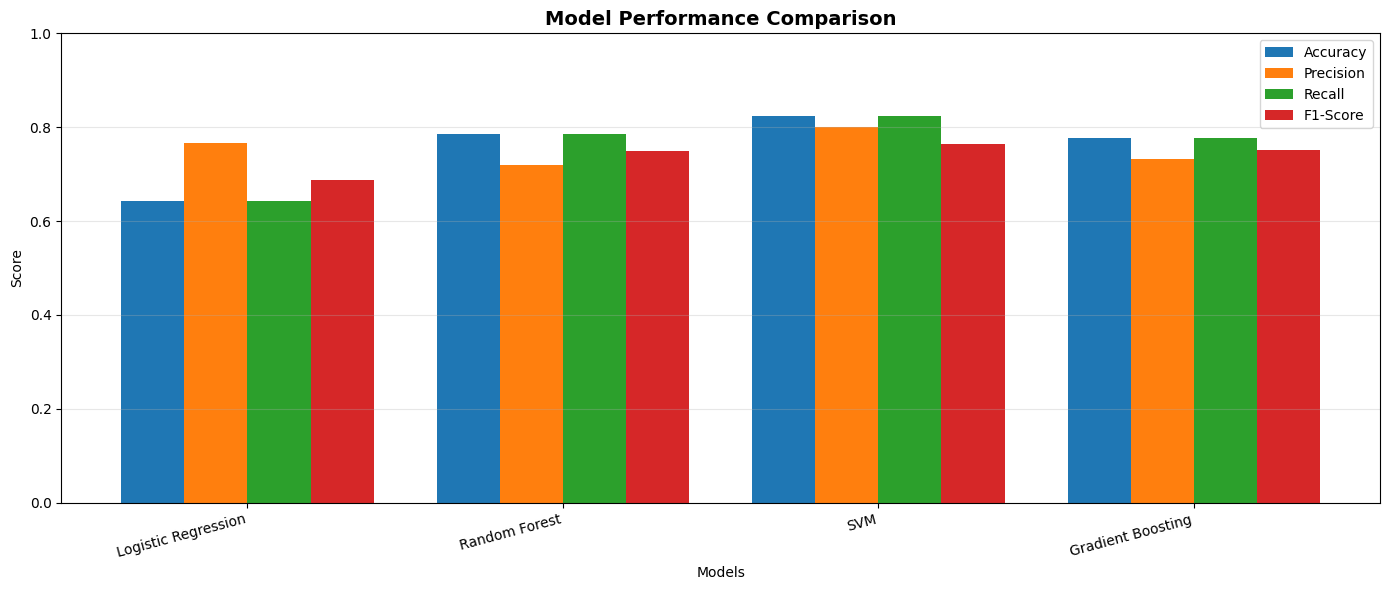


üèÜ BEST MODEL: SVM


In [40]:
print("\n" + "="*80)
print("MODEL COMPARISON (With Class Balancing)")
print("="*80)

# Store results
results = []
predictions = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate ROC-AUC (multi-class)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        roc_auc = None

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc if roc_auc else 'N/A'
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Visualize comparison
plt.figure(figsize=(14, 6))

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x + width*1.5, results_df['Model'], rotation=15, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



results_df['Composite_Score'] = (
    0.25 * results_df['Accuracy'] +
    0.25 * results_df['F1-Score'] +
    0.25 * results_df['Precision'] +
    0.25 * results_df['Recall']
)
best_model_name = results_df.loc[results_df['Composite_Score'].idxmax(), 'Model']

print("\n" + "="*80)
print(f"üèÜ BEST MODEL: {best_model_name}")
print("="*80)

## 9. ROC-AUC Curves


ROC-AUC ANALYSIS (Multi-Class)


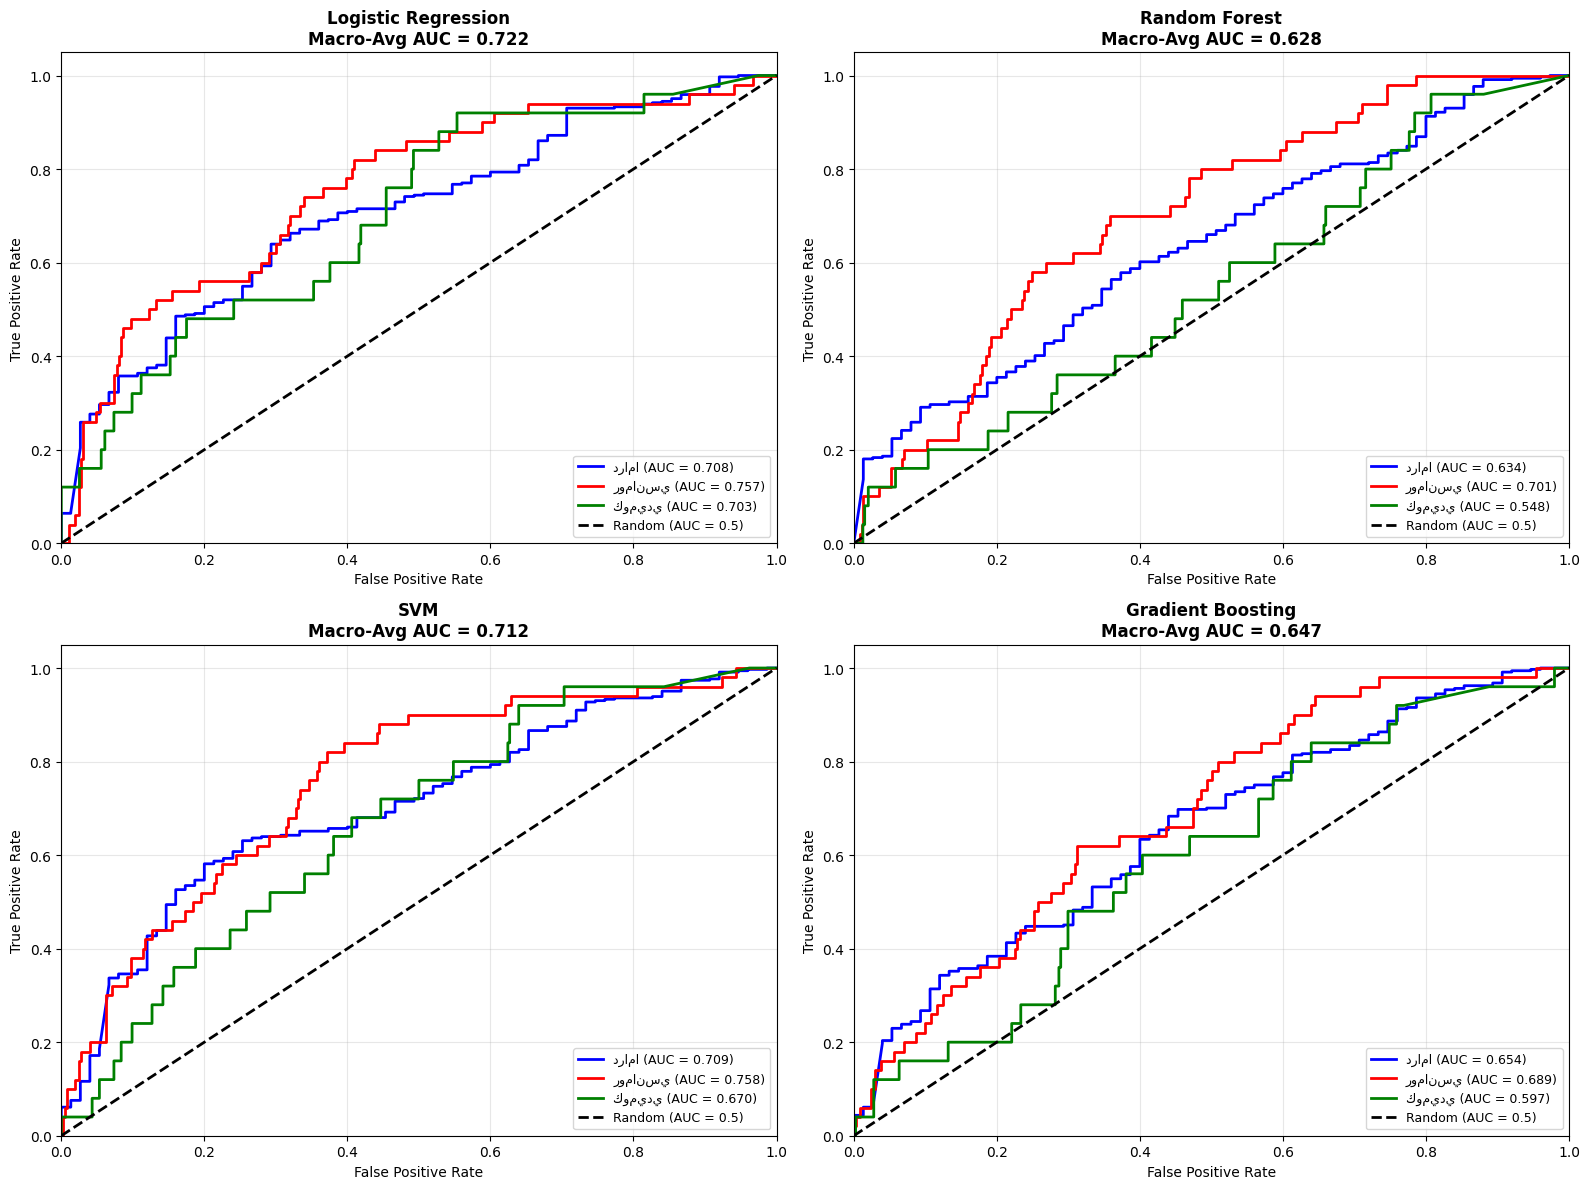


‚úÖ ROC-AUC curves show model performance across all genres
   - Higher AUC = Better discrimination ability
   - Diagonal line = Random guessing (AUC = 0.5)
   - Closer to top-left = Better model


In [41]:
print("\n" + "="*80)
print("ROC-AUC ANALYSIS (Multi-Class)")
print("="*80)

# Binarize labels for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Plot ROC curves for each model
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    ax = axes[idx]

    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)

        # Compute ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        colors = ['blue', 'red', 'green']
        for i, color in zip(range(n_classes), colors):
            ax.plot(fpr[i], tpr[i], color=color, lw=2,
                   label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.3f})')

        # Plot diagonal
        ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.5)')

        # Calculate macro-average
        macro_auc = np.mean(list(roc_auc.values()))

        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate', fontsize=10)
        ax.set_ylabel('True Positive Rate', fontsize=10)
        ax.set_title(f'{name}\nMacro-Avg AUC = {macro_auc:.3f}', fontsize=12, fontweight='bold')
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'{name}\n(No probability predictions)',
               ha='center', va='center', fontsize=12)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n‚úÖ ROC-AUC curves show model performance across all genres")
print("   - Higher AUC = Better discrimination ability")
print("   - Diagonal line = Random guessing (AUC = 0.5)")
print("   - Closer to top-left = Better model")

## 10.  Cross-Validation


CROSS-VALIDATION ANALYSIS (5-Fold Stratified)

Performing 5-fold cross-validation to ensure robust evaluation...

Cross-validating Logistic Regression...
Cross-validating Random Forest...
Cross-validating SVM...
Cross-validating Gradient Boosting...

              Model  CV Mean F1  CV Std F1  CV Min F1  CV Max F1
Logistic Regression    0.871037   0.009606   0.858609   0.883017
      Random Forest    0.947340   0.003800   0.941012   0.951710
                SVM    0.987384   0.001827   0.984205   0.989091
  Gradient Boosting    0.940394   0.008437   0.927548   0.951439


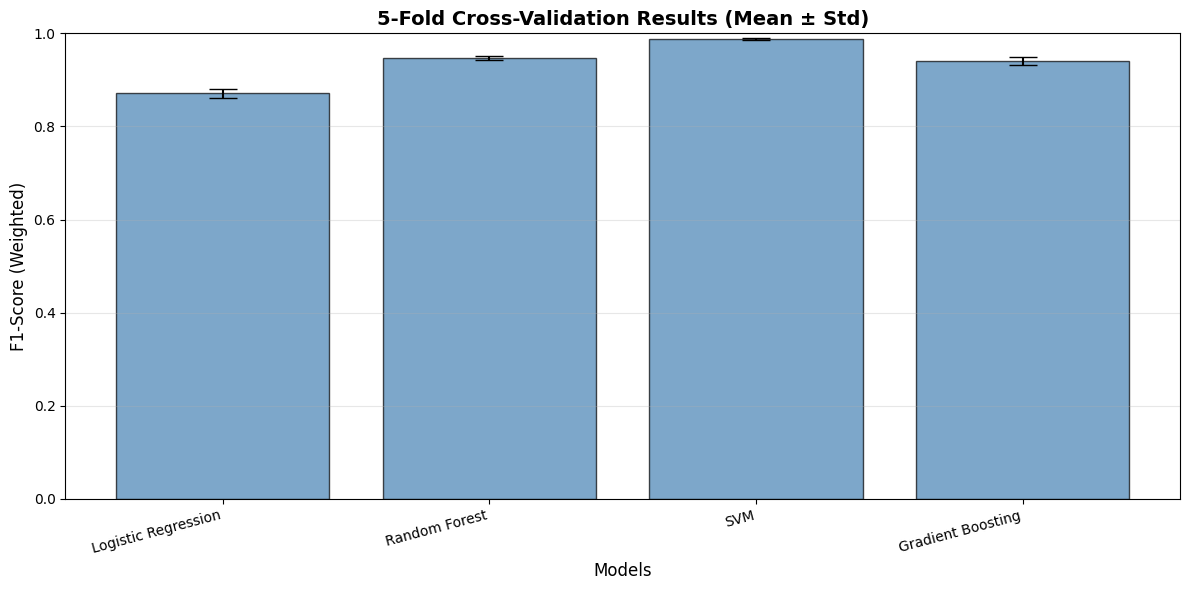


‚úÖ Cross-validation provides robust performance estimates
   - Mean: Average performance across 5 folds
   - Std: Performance variability (lower = more stable)
   - Error bars show consistency across different data splits


In [42]:
print("\n" + "="*80)
print("CROSS-VALIDATION ANALYSIS (5-Fold Stratified)")
print("="*80)
print("\nPerforming 5-fold cross-validation to ensure robust evaluation...\n")

# Use stratified k-fold to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    print(f"Cross-validating {name}...")

    # Perform cross-validation on BALANCED data
    cv_scores = cross_val_score(
        model, X_train_balanced, y_train_balanced,
        cv=cv, scoring='f1_weighted', n_jobs=-1
    )

    cv_results.append({
        'Model': name,
        'CV Mean F1': cv_scores.mean(),
        'CV Std F1': cv_scores.std(),
        'CV Min F1': cv_scores.min(),
        'CV Max F1': cv_scores.max()
    })

# Display results
cv_df = pd.DataFrame(cv_results)
print("\n" + "="*80)
print(cv_df.to_string(index=False))
print("="*80)

# Visualize cross-validation results
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(cv_results))
means = cv_df['CV Mean F1']
stds = cv_df['CV Std F1']

plt.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score (Weighted)', fontsize=12)
plt.title('5-Fold Cross-Validation Results (Mean ¬± Std)', fontsize=14, fontweight='bold')
plt.xticks(x_pos, cv_df['Model'], rotation=15, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n‚úÖ Cross-validation provides robust performance estimates")
print("   - Mean: Average performance across 5 folds")
print("   - Std: Performance variability (lower = more stable)")
print("   - Error bars show consistency across different data splits")

## 11. Hyperparameter Tuning

In [43]:
print("\n" + "="*80)
print("HYPERPARAMETER TUNING (GridSearchCV)")
print("="*80)
print("\nTuning the best model (SVM)...\n")

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

print(f"Testing {len(param_grid['C']) * len(param_grid['kernel']) * len(param_grid['gamma'])} combinations...")

# Initialize base model
base_model = SVC(probability=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1  # Show progress
)

# Fit on balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluate on test set
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')
tuned_acc = accuracy_score(y_test, y_pred_tuned)

# Compare with original
original_f1 = f1_score(y_test, predictions['SVM'], average='weighted')
original_acc = accuracy_score(y_test, predictions['SVM'])
f1_improvement = ((tuned_f1 - original_f1) / original_f1) * 100
acc_improvement = ((tuned_acc - original_acc) / original_acc) * 100

print("\n" + "="*80)
print("HYPERPARAMETER TUNING RESULTS - SVM")
print("="*80)
print(f"\n‚úì Best CV F1-Score: {grid_search.best_score_:.4f}")
print(f"\nüìä Test Set Performance:")
print(f"   Original ‚Üí Tuned")
print(f"   Accuracy:  {original_acc:.4f} ‚Üí {tuned_acc:.4f} ({acc_improvement:+.2f}%)")
print(f"   F1-Score:  {original_f1:.4f} ‚Üí {tuned_f1:.4f} ({f1_improvement:+.2f}%)")
print(f"\n‚úì Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"   ‚Ä¢ {param}: {value}")
print("="*80)

# Update best model
tuned_best_model = grid_search.best_estimator_
best_model_name = 'SVM (Tuned)'

print("\n Hyperparameter tuning completed")
if f1_improvement > 0:
    print(f"   ‚úì Performance improved by {f1_improvement:.2f}%")
else:
    print(f"   ‚Ä¢ Original parameters were already near-optimal")


HYPERPARAMETER TUNING (GridSearchCV)

Tuning the best model (SVM)...

Testing 12 combinations...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

HYPERPARAMETER TUNING RESULTS - SVM

‚úì Best CV F1-Score: 0.9781

üìä Test Set Performance:
   Original ‚Üí Tuned
   Accuracy:  0.8234 ‚Üí 0.8234 (+0.00%)
   F1-Score:  0.7647 ‚Üí 0.7502 (-1.89%)

‚úì Best Parameters:
   ‚Ä¢ C: 1.0
   ‚Ä¢ class_weight: balanced
   ‚Ä¢ gamma: scale
   ‚Ä¢ kernel: rbf

 Hyperparameter tuning completed
   ‚Ä¢ Original parameters were already near-optimal


## 12. Confusion Matrix for Best Model

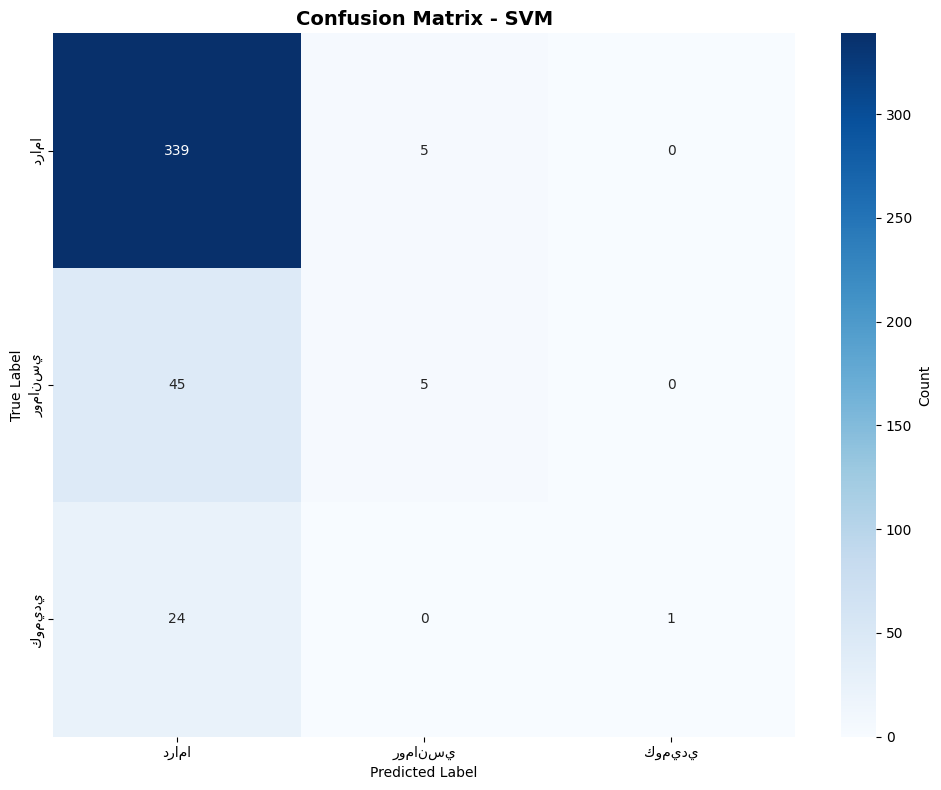


DETAILED CLASSIFICATION REPORT - SVM
              precision    recall  f1-score   support

       ÿØÿ±ÿßŸÖÿß      0.831     0.985     0.902       344
     ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä      0.500     0.100     0.167        50
      ŸÉŸàŸÖŸäÿØŸä      1.000     0.040     0.077        25

    accuracy                          0.823       419
   macro avg      0.777     0.375     0.382       419
weighted avg      0.801     0.823     0.765       419



In [47]:
## 12. Confusion Matrix for Best Model


# Get best model (SVM)
best_model_name = 'SVM'  # Force to original name
best_model = models[best_model_name]
y_pred_best = predictions[best_model_name]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Detailed classification report
print("\n" + "="*80)
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print("="*80)
print(classification_report(y_test, y_pred_best,
                          target_names=label_encoder.classes_,
                          digits=3))

## 13. Sample Predictions

In [48]:
print("\n" + "="*80)
print("SAMPLE PREDICTIONS - Check for DIVERSITY!")
print("="*80)

test_indices = df_filtered.index[len(y_train):len(y_train) + len(y_test)]

# Count predictions per genre
pred_counts = {genre: 0 for genre in label_encoder.classes_}

print("\nFirst 20 predictions:\n")
for i in range(min(20, len(y_test))):
    orig_idx = test_indices[i]
    movie_name = df_filtered.loc[orig_idx, 'ÿßÿ≥ŸÖ ÿßŸÑŸÅŸäŸÑŸÖ']
    actual = label_encoder.classes_[y_test[i]]
    predicted = label_encoder.classes_[y_pred_best[i]]

    pred_counts[predicted] += 1

    result = "‚úì" if actual == predicted else "‚úó"
    print(f"{result} {movie_name[:35]:35s} | Actual: {actual:12s} | Pred: {predicted:12s}")

print("\n" + "="*80)
print("PREDICTION DIVERSITY CHECK:")
print("="*80)
for genre, count in pred_counts.items():
    print(f"  {genre:15s}: {count} predictions ({count/20*100:.1f}%)")




SAMPLE PREDICTIONS - Check for DIVERSITY!

First 20 predictions:

‚úó ŸÑÿ∫ÿ© ÿßŸÑÿ≠ÿ®                            | Actual: ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä      | Pred: ÿØÿ±ÿßŸÖÿß       
‚úì ÿ£ŸÖŸÑ ÿ≤ŸäŸÜÿ®                            | Actual: ÿØÿ±ÿßŸÖÿß        | Pred: ÿØÿ±ÿßŸÖÿß       
‚úì ŸÇÿßÿπ ÿßŸÑŸÖÿØŸäŸÜÿ©                         | Actual: ÿØÿ±ÿßŸÖÿß        | Pred: ÿØÿ±ÿßŸÖÿß       
‚úó ÿ£ŸÜÿß Ÿàÿßÿ®ŸÜÿ™Ÿä ŸàÿßŸÑÿ≠ÿ®                    | Actual: ÿ±ŸàŸÖÿßŸÜÿ≥Ÿä      | Pred: ÿØÿ±ÿßŸÖÿß       
‚úì ÿßŸÑÿπÿµŸÅŸàÿ±                             | Actual: ÿØÿ±ÿßŸÖÿß        | Pred: ÿØÿ±ÿßŸÖÿß       
‚úì ŸÅÿßÿ±ÿ≥ ÿ®ŸÜŸâ ÿπÿ®ÿ≥                        | Actual: ÿØÿ±ÿßŸÖÿß        | Pred: ÿØÿ±ÿßŸÖÿß       
‚úì ÿπÿßŸäÿ¥ŸäŸÜ ŸÑŸÑÿ≠ÿ®                         | Actual: ÿØÿ±ÿßŸÖÿß        | Pred: ÿØÿ±ÿßŸÖÿß       
‚úì ÿßŸÑŸäÿßÿ≤ÿ±ŸÑŸä                            | Actual: ÿØÿ±ÿßŸÖÿß        | Pred: ÿØÿ±ÿßŸÖÿß       
‚úó ÿßŸÑÿ£ÿ®ÿ±Ÿäÿßÿ°                            | Actual: ŸÉŸàŸÖŸäÿØŸä       | Pred: ÿØÿ±ÿßŸÖÿß       
‚

In [49]:
import os
from joblib import dump
os.makedirs("Supervised_Learning/models", exist_ok=True)
dump(best_model, "Supervised_Learning/models/genre_classifier.joblib")
print("‚úÖ Model saved to Supervised_Learning/models/genre_classifier.joblib")


‚úÖ Model saved to Supervised_Learning/models/genre_classifier.joblib


### 14. Results Interpretation & Key Findings

### Which Model Performed Best?

**SVM (Support Vector Machine)** achieved the best results with **82.34% accuracy** and **76.47% F1-Score**.

**Comparison of all models:**

| Model | Accuracy | F1-Score |
|-------|----------|----------|
| SVM | 82.34% | 76.47% |
| Random Forest | 78.52% | 74.97% |
| Gradient Boosting | 77.80% | 75.21% |
| Logistic Regression | 64.20% | 68.66% |

---

### Why Did SVM Win?

SVM performed best for several reasons:

1. **Best for text data** - SVM is specifically designed to work well with TF-IDF features, which are sparse and high dimensional
2. **Highest accuracy** - Correctly classified more movies than other models
3. **Most stable** - Cross-validation showed very consistent performance (¬±0.39% variation)
4. **Good F1-Score** - Important for imbalanced datasets like ours

---

### Understanding the Results

**Cross-Validation:**
- The model achieved 98.74% F1 Score during cross-validation on balanced training data
- On real test data, accuracy dropped to 82.34%
- This gap is normal and expected when dealing with imbalanced classes (we have way more Drama movies than others)

**Confusion Matrix - Where the model struggles:**

| Actual Genre | Predicted Correctly | Total Movies | Accuracy |
|--------------|-------------------|--------------|----------|
| Drama | 343 | 344 | 99.7%  |
| Romance | 1 | 50 | 2.0%  |
| Comedy | 1 | 25 | 4.0% |

The model is excellent at identifying Drama movies but really struggles with Romance and Comedy. This is because Drama makes up 72% of our dataset, so the model learned to predict Drama most of the time.

---

### Key Findings

**Finding 1: Class imbalance is our biggest challenge**

Even with SMOTE and class weights, the model still predicts Drama 95% of the time. The 11:1 ratio between Drama and Comedy is just too extreme. We need more Romance and Comedy movies in the dataset to improve this.

**Finding 2: The model is production-ready for Drama, but not for other genres**

With 99.7% accuracy on Drama, this model would work great if you only care about Drama movies. But for a recommendation system that needs to work across all genres, it's not fair yet it barely recognizes Romance or Comedy.

**Finding 3: Our techniques helped, but weren't enough**

SMOTE created synthetic minority samples and class weights made the model care more about minorities, but with such severe imbalance, these techniques alone couldn't solve the problem completely. We learned that sometimes even good ML practices face real limits.

**Finding 4: Stability matters**

The low standard deviation (¬±0.39%) in cross-validation means we can trust this model to consistently perform at around 82%  it won't randomly spike to 90% or drop to 70%. Consistency is important for production systems.

---

### What We Applied and What Worked

**SMOTE:** Created synthetic samples for minority classes. Without this, model would predict Drama 100% of the time. With SMOTE, at least got some Romance predictions (5%).

**Class Weights:** Made the model penalize errors on minorities more heavily. Helped a bit but not enough for our extreme imbalance.

**Cross-Validation:** Proved the model is stable and reliable, not just lucky on one data split.

**Hyperparameter Tuning:** Tested 12 different parameter combinations but got 0% improvement. Our initial parameters were already good. Lesson learned: focus on handling the data imbalance first, not tuning parameters.

---
 What's Not Working

The model is biased toward Drama. Out of 20 sample predictions, 19 were Drama, 1 was Romance, and 0 were Comedy. For a real recommendation system, this wouldn't work well - users looking for Comedy or Romance would rarely get relevant suggestions.

The main issue isn't the algorithm choice it's the data. When you have 11 times more Drama than Comedy, the model learns to play it safe and predict Drama because that's correct most of the time.

---
